<a href="https://colab.research.google.com/github/Kaninika-Datta/Final-Projects/blob/vftvk-Simple-Interest-Calculator/Glasses_and_No_Glasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adnanzaidi/glasses

glasses.zip: Skipping, found more recently modified local copy (use --force to force download)
glasses.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/glasses.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted
The dataset is extracted


In [ ]:
!ls

 glasses.jpg	     glasses.zip   sample_data	       'with glasses.jpg'
 glasses-noglasses   kaggle.json  'with glasses.jpeg'  'without glasses.jpeg'
 glasses.jpg	     glasses.zip   sample_data	       'with glasses.jpg'
 glasses-noglasses   kaggle.json  'with glasses.jpeg'  'without glasses.jpeg'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
with_glasses= os.listdir('/content/glasses-noglasses/train/glasses')
without_glasses=os.listdir('/content/glasses-noglasses/train/noglasses')
print(with_glasses[0:5])
print(without_glasses[0:5])

['row-1-column-10.jpg', 'row-4-column-8.jpg', 'row-3-column-2.jpg', 'row-1-column-8.jpg', 'row-3-column-6.jpg']
['row-9-column-4.jpg', 'row-9-column-1.jpg', 'row-8-column-8.jpg', 'row-8-column-3.jpg', 'row-7-column-10.jpg']
['row-1-column-10.jpg', 'row-4-column-8.jpg', 'row-3-column-2.jpg', 'row-1-column-8.jpg', 'row-3-column-6.jpg']
['row-9-column-4.jpg', 'row-9-column-1.jpg', 'row-8-column-8.jpg', 'row-8-column-3.jpg', 'row-7-column-10.jpg']


In [ ]:
print('Number of with glass images:', len(with_glasses))
print('Number of without glass images:', len(without_glasses))

Number of fake face images: 52
Number of real face images: 52
Number of fake face images: 52
Number of real face images: 52


In [ ]:
# create the labels
with_glasses_labels = [1]*52
without_glasses_labels = [0]*52

In [ ]:
print(with_glasses_labels[0:5])
print(without_glasses_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_glasses_labels))
print(len(without_glasses_labels))

52
52
52
52


In [ ]:
labels=with_glasses_labels+without_glasses_labels
print(len(labels))

104
104


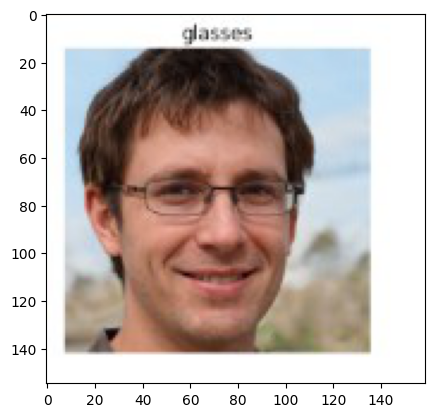

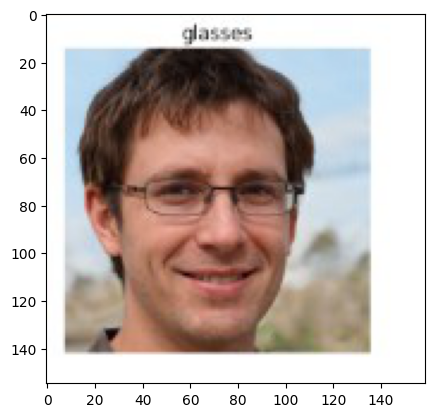

In [ ]:
#fake image
img=mpimg.imread('/content/glasses-noglasses/train/glasses/row-1-column-4.jpg')
plt.imshow(img)
plt.show()

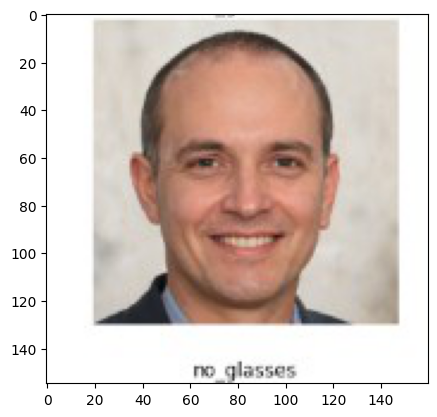

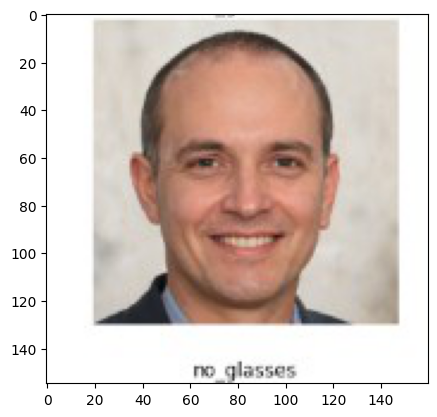

In [ ]:
#real image
img=mpimg.imread('/content/glasses-noglasses/train/noglasses/row-10-column-2.jpg')
plt.imshow(img)
plt.show()

Image Preprocessing

1.Resize the images
2.Convert the images to numpy arrays.

In [ ]:
#without glasses
without_glasses_path='/content/glasses-noglasses/train/noglasses/'
data=[]
for img_file in without_glasses:
  image=Image.open(without_glasses_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
#with glasses
with_glasses_path='/content/glasses-noglasses/train/glasses/'

for img_file in with_glasses:
  image=Image.open(with_glasses_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
len(data)

104

104

In [ ]:
data[0].shape

(128, 128, 3)

(128, 128, 3)

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
print(X.shape,Y.shape)

(104, 128, 128, 3) (104,)
(104, 128, 128, 3) (104,)


In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(104, 128, 128, 3) (83, 128, 128, 3) (21, 128, 128, 3)
(104, 128, 128, 3) (83, 128, 128, 3) (21, 128, 128, 3)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0].shape

(128, 128, 3)

(128, 128, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.vgg16 import VGG16

In [ ]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(128,128,3))
mnet.trainable=False

In [ ]:
mnet_model=Sequential([
                  mnet,
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(64,activation='relu'),
                  #Dense(32,activation='relu'),
                  Dense(2, activation = "sigmoid")
    ])

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.0001)
mnet_model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,metrics=['accuracy'])

In [ ]:
history=mnet_model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
3/3 [==============================] - 7s 2s/step - loss: 0.6454 - accuracy: 0.6622 - val_loss: 0.7702 - val_accuracy: 0.7778
Epoch 2/10
3/3 [==============================] - 1s 313ms/step - loss: 0.5624 - accuracy: 0.7162 - val_loss: 0.7345 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 1s 314ms/step - loss: 0.5144 - accuracy: 0.7973 - val_loss: 0.7091 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 1s 315ms/step - loss: 0.4757 - accuracy: 0.8108 - val_loss: 0.7165 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 1s 290ms/step - loss: 0.4439 - accuracy: 0.8649 - val_loss: 0.6950 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 1s 301ms/step - loss: 0.4132 - accuracy: 0.8378 - val_loss: 0.6875 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 1s 314ms/step - loss: 0.3887 - accuracy: 0.8784 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 8/10
3/3 [=======

In [ ]:
loss,accuracy=mnet_model.evaluate(X_test,Y_test)
accuracy

1/1 [==============================] - 0s 246ms/step - loss: 0.4022 - accuracy: 0.8095


0.8095238208770752

In [ ]:
vgg16 = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(128,128,3))
vgg16.trainable=False

In [ ]:
vgg16_model=Sequential([
                  vgg16,
                  Flatten(),
                  #Dense(128,activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(2, activation = "sigmoid")
    ])

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
vgg16_model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam',metrics=['accuracy'])

In [ ]:
history=vgg16_model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
3/3 [==============================] - 7s 885ms/step - loss: 2.3113 - accuracy: 0.5135 - val_loss: 1.4476 - val_accuracy: 0.5556
Epoch 2/10
3/3 [==============================] - 1s 305ms/step - loss: 0.7481 - accuracy: 0.6622 - val_loss: 0.6828 - val_accuracy: 0.7778
Epoch 3/10
3/3 [==============================] - 1s 327ms/step - loss: 0.1709 - accuracy: 0.9459 - val_loss: 1.1452 - val_accuracy: 0.7778
Epoch 4/10
3/3 [==============================] - 1s 332ms/step - loss: 0.0510 - accuracy: 0.9730 - val_loss: 1.8574 - val_accuracy: 0.7778
Epoch 5/10
3/3 [==============================] - 1s 341ms/step - loss: 0.0936 - accuracy: 0.9595 - val_loss: 1.2818 - val_accuracy: 0.7778
Epoch 6/10
3/3 [==============================] - 1s 327ms/step - loss: 7.0639e-04 - accuracy: 1.0000 - val_loss: 0.9208 - val_accuracy: 0.8889
Epoch 7/10
3/3 [==============================] - 1s 315ms/step - loss: 7.9647e-04 - accuracy: 1.0000 - val_loss: 0.7103 - val_accuracy: 0.8889
Epoch 8/10
3

In [ ]:
loss,accuracy=vgg16_model.evaluate(X_test,Y_test)
accuracy

1/1 [==============================] - 0s 258ms/step - loss: 0.5188 - accuracy: 0.9048


0.9047619104385376

Path of the image to be predicted: /content/with glasses.jpeg


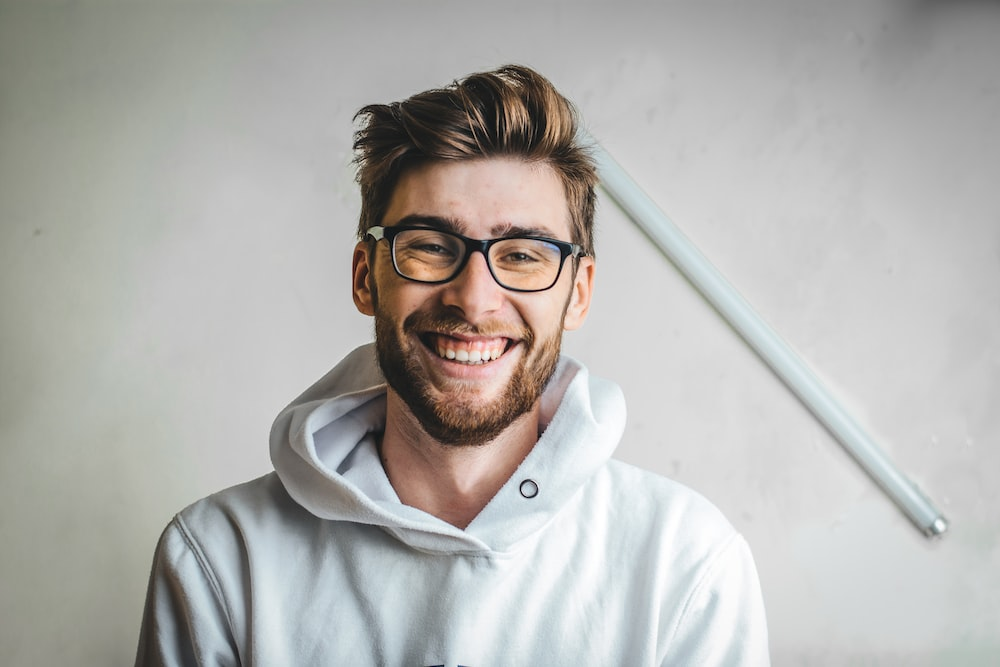

1/1 [==============================] - 0s 88ms/step
[[0.3704662  0.20216383]]
0
The person in the image is with glasses


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = mnet_model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is without glasses')

else:

  print('The person in the image is with glasses')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = vgg16_model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is without glasses')

else:

  print('The person in the image is with glasses')

Path of the image to be predicted: /content/with glasses.jpg
